<a href="https://colab.research.google.com/github/gunjanak/Geo_in_python/blob/main/plotting_provinces_nepal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#installing required libraries

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 14.2 MB/s 
     |████████████████████████████████| 15.4 MB 66.4 MB/s 
     |████████████████████████████████| 6.3 MB 56.8 MB/s 


In [2]:
!pip install geoplot

     |████████████████████████████████| 10.8 MB 14.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 44.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 82.8 MB/s 
     |████████████████████████████████| 219 kB 64.2 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516303 sha256=3967d4ba139e38c222f84fe96043744f9e2d1776c63cbe7222f8f7804bf72e40
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=13f01eaa1241b86159bd2317aa4c807647a4365

#Importing libraries

In [3]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [4]:
%matplotlib inline

#Read The province data

In [5]:
nepal_pro = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Rajesh_ko_homework/Nepal_hydro/Nepal_province/province.shp")
nepal_pro.head()

,fid,FIRST_STAT,geometry
0,1,1.0,"POLYGON ((86.57990 28.11065, 86.58082 28.11041..."
1,2,2.0,"POLYGON ((84.56515 27.46308, 84.56651 27.46236..."
2,3,3.0,"POLYGON ((85.71189 28.38580, 85.71191 28.38449..."
3,4,4.0,"POLYGON ((83.96381 29.33102, 83.96438 29.33097..."
4,5,5.0,"POLYGON ((82.67124 28.85218, 82.67170 28.85209..."


#Plotting map

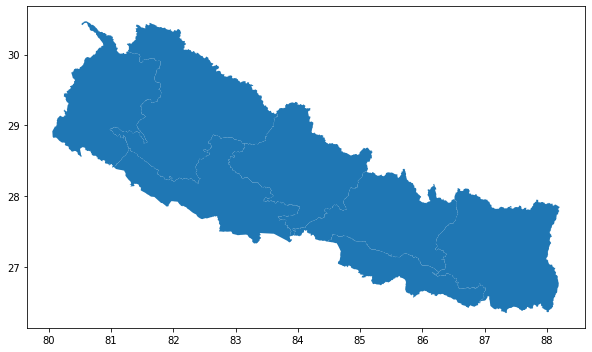

In [6]:
nepal_pro.plot(figsize=(10, 8))

#Boundaries

In [7]:
nepal_pro['boundary'] = nepal_pro.boundary

In [8]:
nepal_pro.head()

,fid,FIRST_STAT,geometry,boundary
0,1,1.0,"POLYGON ((86.57990 28.11065, 86.58082 28.11041...","LINESTRING (86.57990 28.11065, 86.58082 28.110..."
1,2,2.0,"POLYGON ((84.56515 27.46308, 84.56651 27.46236...","LINESTRING (84.56515 27.46308, 84.56651 27.462..."
2,3,3.0,"POLYGON ((85.71189 28.38580, 85.71191 28.38449...","LINESTRING (85.71189 28.38580, 85.71191 28.384..."
3,4,4.0,"POLYGON ((83.96381 29.33102, 83.96438 29.33097...","LINESTRING (83.96381 29.33102, 83.96438 29.330..."
4,5,5.0,"POLYGON ((82.67124 28.85218, 82.67170 28.85209...","LINESTRING (82.67124 28.85218, 82.67170 28.852..."


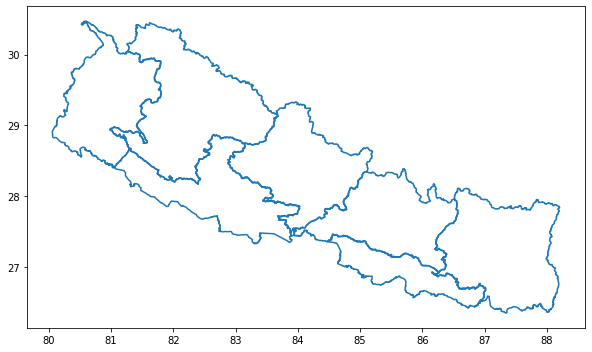

In [9]:
nepal_pro.boundary.plot(figsize=(10,8))

#Centroid of all province

In [10]:
nepal_pro['centroid'] = nepal_pro.centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [11]:
nepal_pro.head()

,fid,FIRST_STAT,geometry,boundary,centroid
0,1,1.0,"POLYGON ((86.57990 28.11065, 86.58082 28.11041...","LINESTRING (86.57990 28.11065, 86.58082 28.110...",POINT (87.27185 27.21045)
1,2,2.0,"POLYGON ((84.56515 27.46308, 84.56651 27.46236...","LINESTRING (84.56515 27.46308, 84.56651 27.462...",POINT (85.68956 26.93044)
2,3,3.0,"POLYGON ((85.71189 28.38580, 85.71191 28.38449...","LINESTRING (85.71189 28.38580, 85.71191 28.384...",POINT (85.47045 27.67858)
3,4,4.0,"POLYGON ((83.96381 29.33102, 83.96438 29.33097...","LINESTRING (83.96381 29.33102, 83.96438 29.330...",POINT (84.04965 28.40899)
4,5,5.0,"POLYGON ((82.67124 28.85218, 82.67170 28.85209...","LINESTRING (82.67124 28.85218, 82.67170 28.852...",POINT (82.68447 28.05184)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


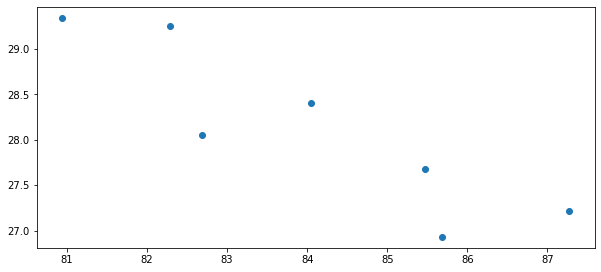

In [12]:
nepal_pro.centroid.plot(figsize=(10,8))

In [13]:
cen = nepal_pro['centroid']

In [14]:
type(cen)

geopandas.geoseries.GeoSeries

In [15]:
type(cen[0])

shapely.geometry.point.Point

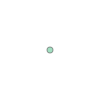

In [16]:
cen[1]

In [17]:
type(cen)

geopandas.geoseries.GeoSeries

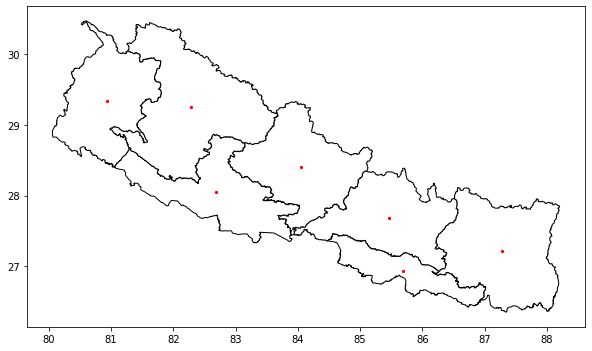

In [18]:
base = nepal_pro.plot(color='white', edgecolor='black',figsize=(10,8))
cen.plot(ax=base, marker='o', color='red', markersize=5)

#Area wise colormap plot of all province

In [19]:
area = [25905,9661,20300,21504,22288,27984,19915]

In [20]:
nepal_pro['area'] = area

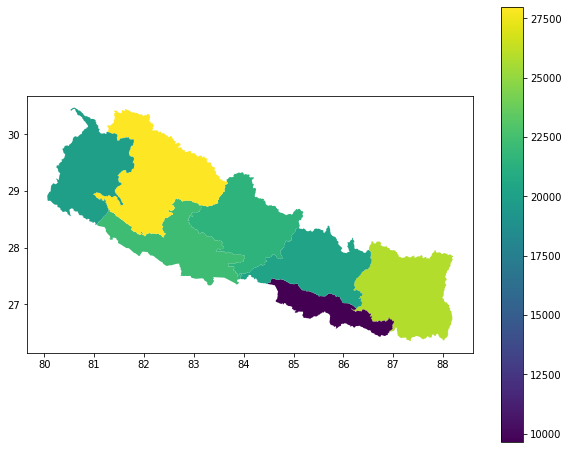

In [21]:
nepal_pro.plot("area", legend=True,figsize=(10,8))

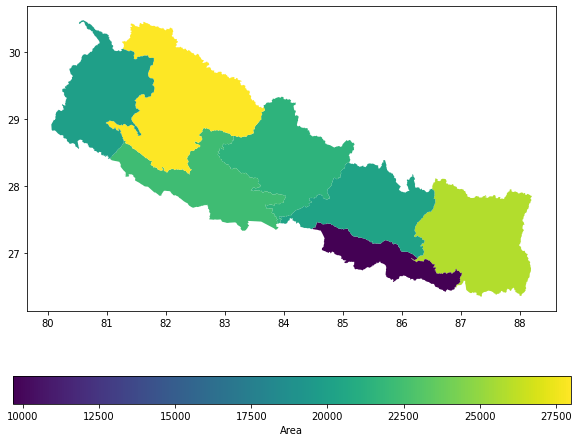

In [22]:
nepal_pro.plot(column='area',
           legend=True,
           legend_kwds={'label': "Area",
                        'orientation': "horizontal"},figsize=(10,8))

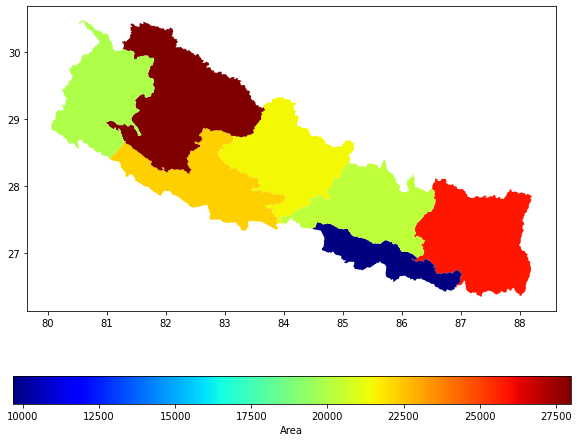

In [23]:
#https://matplotlib.org/2.0.2/users/colormaps.html
nepal_pro.plot(column='area',
           legend=True,
           legend_kwds={'label': "Area",
                        'orientation': "horizontal"},figsize=(10,8),cmap='jet')